# Dataset info
The client provides you with a dataset, collected from a survey, conducted by some
experts in the domain with master's degrees in Statistical Sciences for Decision
Making. It analyzes individuals' perceptions of seismic events. The study
specifically focuses on the seismic activity in the Campi Flegrei area. The Data Set
has the following fields: 
<ol>
    <li>age - Age of the participant</li>
    <li>sex - Sex of the participant</li>
    <li>marital_status - Marital status of the participant</li>
    <li>residence - City of residence of the participant</li>
    <li>education - Education level of the participant</li>
    <li>occupation - Employment status of the participant</li>
    <li>out_of_region_employment - Whether the participant works or studies outside the Campania region</li>
    <li>family_members - Number of family members (including the participant)</li>
    <li>family_disabilities - Presence of disabilities in the family</li>
    <li>house_floor - Floor of the house where the participant lives</li>
    <li>earthquake80 - Whether the participant experienced the Irpinia earthquake of 1980</li>
    <li>political_orientation - Political orientation of the participant</li>
    <li>shocks - Frequency with which the participant perceives seismic shocks</li>
    <li>fear - Level of fear regarding earthquakes</li>
    <li>anxiety - Level of anxiety regarding earthquakes</li>
    <li>physiological_symptoms - Presence of physiological symptoms related to seismic stress</li>
    <li>decision_timeliness - Timeliness in making decisions during an earthquake</li>
    <li>insomnia - Presence of insomnia related to seismic stress</li>
    <li>seismic_concern - Level of concern about earthquakes</li>
    <li>abroad - Whether the participant has lived abroad</li>
    <li>out_of_region - Whether the participant has lived outside the Campania region</li>
    <li>out_of_region_earthquake - Whether the participant has experienced an earthquake outside the Campania region</li>
    <li>change_of_residence - Whether the participant has changed residence due to an earthquake</li>
    <li>change_of_residence_earthquake - Willingness to change residence due to an earthquake</li>
    <li>red_zone_frequency - Frequency of visits to the seismic red zone</li>
    <li>radio_info - Level of trust in information received from the radio</li>
    <li>TV_info - Level of trust in information received from the TV</li>
    <li>social_media_info - Level of trust in information received from social media</li>
    <li>newspaper_info - Level of trust in information received from newspapers</li>
    <li>app_info - Level of trust in information received from apps</li>
    <li>municipal_institutions_trust - Level of trust in municipal institutions</li>
    <li>regional_institutions_trust - Level of trust in regional institutions</li>
    <li>national_institutions_trust - Level of trust in national institutions</li>
    <li>INGV_trust - Level of trust in the National Institute of Geophysics and Volcanology (INGV)</li>
    <li>security - Level of perceived personal safety regarding earthquakes</li>
    <li>reception_centers - Knowledge of reception centers for earthquakes</li>
    <li>property_house - Whether the participant owns their house</li>
    <li>housing_type - Type of housing where the participant lives</li>
    <li>elevator - Whether the participant's residence has an elevator</li>
    <li>n_vehicles - Number of vehicles owned by the participant</li>
    <li>vehicle_type - Type of vehicles owned by the participant</li>
    <li>end_of_month - Perceived economic difficulty at the end of the month</li>
    <li>salary - Annual gross income of the participant</li>
</ol>

### Problem: define individuals' perceptions of seismic events

In [1]:
# Import libraries
# work with data 
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# missing values
from reparo import CDI, KNNImputer
from sklearn.impute import KNNImputer

# outliers detection
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# pipelines
from sklearn.pipeline import Pipeline

# import pipeline classes 
from pre import FeatureEncoder, ColumnDropper, MultiColumnImputer

# outliers detetion
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# scaling
from sklearn.preprocessing import StandardScaler

# train and test split 
from sklearn.model_selection import train_test_split

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Option to show all the columns in the DataFrame
pd.options.display.max_columns = None

In [3]:
# load the data from the csv file
df = pd.read_csv("data.csv")
df

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,Male,Unmarried,Napoli,Upper Secondary School,Student,No,4,No,1,No,Left,3,2,2,2,3,1,2,Yes,Yes,No,No,No,No,3,4,2,4,4,3,3,3,4,2,No,Yes,Apartment,Yes,0,None,1,Up to €15000
1,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student,No,5,No,4,No,Center,1,2,2,1,3,2,4,Yes,Yes,No,Yes,No,Yes,3,2,2,2,2,2,2,2,3,1,No,Yes,Other,Yes,5,Car and Motorcycle,1,Between €28000 and €50000
2,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student Worker,No,5,No,4,No,Left,3,2,2,1,4,2,3,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,2,2,5,3,Yes,Yes,Apartment,Yes,0,None,1,Between €15000 and €28000
3,23.0,Male,Unmarried,Quarto,Upper Secondary School,Student,No,5,No,2,No,None,3,3,3,3,1,3,4,Yes,Yes,Yes,Yes,Yes,Yes,1,1,1,1,1,1,1,1,1,1,No,No,Apartment,No,2,Car,5,Up to €15000
4,64.0,Female,Unmarried,Somma Vesuviana,Degree,Retired,No,1,No,2,Yes,Left,4,4,4,3,2,3,4,Yes,No,No,Yes,Yes,Yes,3,3,3,3,3,2,3,2,4,2,No,No,Apartment,Yes,0,None,3,Between €15000 and €28000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,Male,Unmarried,Caserta,Degree,Student,No,Over 5,No,0 (Ground Floor),No,Center,3,3,3,1,2,2,4,Yes,Yes,No,Yes,No,No,5,5,5,5,5,2,2,2,3,3,No,Yes,Apartment,Yes,3,Car,3,NaN
468,NaN,Female,Unmarried,Cercola,Lower Secondary School,Student,No,3,No,1,No,NaN,2,4,4,3,3,2,4,No,No,No,No,No,Yes,3,3,3,3,3,3,3,3,3,2,No,Yes,Apartment,Yes,1,Car,3,NaN
469,45.0,Female,Unmarried,Pozzuoli,Degree,Employee,No,1,No,Over 5,No,NaN,2,1,2,2,4,2,3,No,Yes,Yes,Yes,Yes,Yes,1,1,3,2,2,2,3,3,3,3,Yes,Yes,Apartment,Yes,1,Car,1,NaN
470,44.0,Female,Cohabiting,Pozzuoli,Postgraduate Degree,Self-Employed,No,4,No,3,No,Left,3,3,4,2,2,4,4,Yes,No,Yes,Yes,Yes,Yes,3,3,4,3,3,3,3,2,4,2,Yes,No,Apartment,No,2,Car,2,Between €28000 and €50000


In [4]:
# analyse the type and the amount of data in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             456 non-null    float64
 1   sex                             470 non-null    object 
 2   marital_status                  472 non-null    object 
 3   residence                       468 non-null    object 
 4   education                       472 non-null    object 
 5   occupation                      472 non-null    object 
 6   out_of_region_employment        472 non-null    object 
 7   family_members                  472 non-null    object 
 8   family_disabilities             464 non-null    object 
 9   house_floor                     472 non-null    object 
 10  earthquake80                    472 non-null    object 
 11  political_orientation           317 non-null    object 
 12  shocks                          472 

In [5]:
df.shape

(472, 43)

In [6]:
df.describe()
# std of the numerical column is not bad

,age,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,n_vehicles,end_of_month
count,456.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,38.872807,2.824153,3.180085,3.364407,2.207627,2.830508,2.921610,3.580508,2.442797,2.489407,2.936441,2.569915,3.201271,2.099576,2.154661,2.065678,3.506356,2.129237,1.506356,2.525424
std,14.358412,1.125279,1.124607,1.202723,1.195935,1.117740,1.397677,1.166537,1.018362,1.038481,1.109784,0.957364,1.048585,0.921920,0.957382,0.936366,0.891075,0.885261,0.990379,1.036177
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,25.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000
50%,37.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.500000,2.000000,1.000000,3.000000
75%,50.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.250000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000
max,90.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Missing values handling part

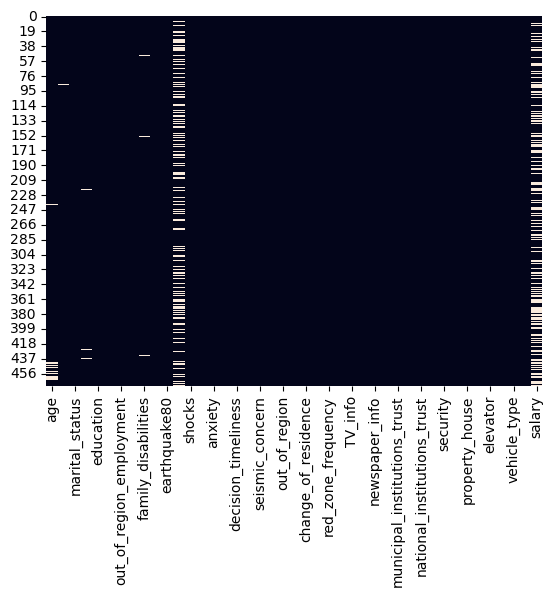

In [7]:
# plot missing data
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [8]:
# Write amount of missing values for every column
df.isna().sum()

age                                16
sex                                 2
marital_status                      0
residence                           4
education                           0
occupation                          0
out_of_region_employment            0
family_members                      0
family_disabilities                 8
house_floor                         0
earthquake80                        0
political_orientation             155
shocks                              0
fear                                0
anxiety                             0
physiological_symptoms              0
decision_timeliness                 0
insomnia                            0
seismic_concern                     0
abroad                              0
out_of_region                       0
out_of_region_earthquake            0
change_of_residence                 0
change_of_residence_earthquake      0
red_zone_frequency                  0
radio_info                          0
TV_info     

In [9]:
# Print all the columns which have NaN values in the 'residence' column
df[df["residence"].isna()]

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
221,33.0,Male,Married,NaN,Degree,Self-Employed,No,4,No,4,No,Right,2,3,2,1,3,2,4,Yes,No,No,No,No,Yes,3,3,3,3,3,1,1,1,3,1,No,Yes,Apartment,No,1,Car,2,NaN
224,40.0,Female,Married,NaN,Upper Secondary School,Employee,No,4,No,1,No,None,2,3,4,2,2,4,4,Yes,Yes,No,Yes,No,No,3,2,1,3,3,4,4,4,4,3,No,No,Apartment,No,2,Car,3,Between €15000 and €28000
425,38.0,Female,Cohabiting,NaN,Upper Secondary School,Employee,No,3,No,0 (Ground Floor),No,Center,3,5,5,1,1,3,5,Yes,No,No,Yes,Yes,Yes,2,2,3,2,2,2,2,1,3,2,No,Yes,Apartment,No,2,Motorcycle/Scooter,3,Up to €15000
437,40.0,Female,Married,NaN,Degree,Employee,No,4,No,5,No,None,3,4,5,2,3,4,5,Yes,Yes,Yes,Yes,Yes,Yes,2,1,3,3,5,1,1,2,3,3,No,Yes,Apartment,Yes,1,Car,3,Between €15000 and €28000


In [10]:
# Print all the columns which have NaN values in the 'political_orientation' column
df[df["political_orientation"].isna()]

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,earthquake80,political_orientation,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region,out_of_region_earthquake,change_of_residence,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
6,26.0,Female,Unmarried,Cancello Ed Arnone,Upper Secondary School,Student Worker,No,4,No,0 (Ground Floor),No,NaN,2,3,3,1,2,3,3,Yes,Yes,No,Yes,No,No,3,3,3,3,3,1,1,3,3,1,No,Yes,Villa/Small Villa,No,3,Car,1,Between €28000 and €50000
11,30.0,Female,Unmarried,San Giuseppe Vesuviano,Degree,Student,No,5,Yes,1,No,NaN,1,2,2,1,1,1,1,Yes,No,No,No,No,Yes,2,2,3,2,3,2,1,1,5,1,No,Yes,Apartment,No,3,Car and Motorcycle,1,NaN
12,22.0,Female,Unmarried,Quarto,Upper Secondary School,Student,No,5,NaN,0 (Ground Floor),No,NaN,2,1,2,2,1,1,2,Yes,Yes,No,Yes,No,Yes,3,3,3,3,3,1,1,1,4,3,No,No,Villa/Small Villa,No,1,Car,3,NaN
19,22.0,Female,Unmarried,Napoli,Degree,Student,No,3,No,1,No,NaN,1,3,4,3,3,2,4,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,3,3,3,3,2,No,Yes,Villa/Small Villa,No,2,Car,2,Between €15000 and €28000
20,23.0,Female,Unmarried,Pozzuoli,Upper Secondary School,Student,No,5,No,0 (Ground Floor),No,NaN,5,3,3,2,3,3,3,Yes,Yes,No,Yes,No,Yes,3,3,3,3,3,2,2,2,3,2,No,Yes,Villa/Small Villa,No,2,Car and Motorcycle,4,Up to €15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,24.0,Female,Unmarried,Caserta,Degree,Student,Yes,3,No,3,No,NaN,3,3,4,3,4,2,2,Yes,Yes,No,Yes,No,Yes,2,2,3,2,3,3,3,3,2,1,No,Yes,Apartment,Yes,3,Car and Motorcycle,3,NaN
466,24.0,Female,Unmarried,Calvi Risorta,Degree,Student,No,5,No,0 (Ground Floor),No,NaN,2,1,1,1,1,1,1,Yes,Yes,No,Yes,No,No,2,2,1,1,1,2,3,3,4,1,No,Yes,Apartment,No,4,Car and Motorcycle,3,NaN
468,NaN,Female,Unmarried,Cercola,Lower Secondary School,Student,No,3,No,1,No,NaN,2,4,4,3,3,2,4,No,No,No,No,No,Yes,3,3,3,3,3,3,3,3,3,2,No,Yes,Apartment,Yes,1,Car,3,NaN
469,45.0,Female,Unmarried,Pozzuoli,Degree,Employee,No,1,No,Over 5,No,NaN,2,1,2,2,4,2,3,No,Yes,Yes,Yes,Yes,Yes,1,1,3,2,2,2,3,3,3,3,Yes,Yes,Apartment,Yes,1,Car,1,NaN


In [11]:
# After a small research I've mentioned that all these residences are parts of different Italy's regions.
# I can group this data by regions or delete the whole column 
# I wanted to make Geographical Grouping, but after I looked on the columns again, I've realised that some of them, like: "shocks",
# "seismic_concern", "red_zone_frequency", can provide me enough information for analysis. 
# So at the moment I consider that column "residence" is MCAR(Missing Completely at Random) and I can drop it
# I don't know how the political orientation influences on the perception of seismic events, so drop it 
# out_of_region, change_of_residence, "out_of_region_employment" are dropped, because they don't have any information related to the individuals' perceptions of seismic events

drop_pipe = Pipeline([
    ('residence_dropper', ColumnDropper(columns=["residence", "political_orientation", "out_of_region", "change_of_residence", "out_of_region_employment"]))
])
dropped_df = drop_pipe.fit_transform(df)
df = dropped_df.copy()

In [12]:
# Print all the columns which have NaN values in the 'age' column
df[df["age"].isna()]
# While all of them are students and almost all unmaried, I think that the age is most probable less then 30. 
# I want to use the KNNI method cause there is depenndecy betweenn "age" and columns  like "sex", "occupation", "education"

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
240,NaN,Female,Unmarried,Upper Secondary School,Student,4,Yes,1,No,3,5,4,4,3,5,5,No,No,No,Yes,3,1,2,3,5,1,1,1,4,3,Yes,Yes,Villa/Small Villa,No,1,Car,3,Up to €15000
404,NaN,Female,Unmarried,Lower Secondary School,Student,3,No,0 (Ground Floor),No,3,4,4,2,3,1,4,Yes,Yes,Yes,No,2,2,3,2,3,3,2,2,3,2,No,No,Apartment,No,1,Car,2,Up to €15000
441,NaN,Female,Unmarried,Upper Secondary School,Student,4,No,0 (Ground Floor),No,3,5,5,4,3,3,5,No,Yes,Yes,No,2,2,4,5,3,2,3,3,3,1,No,Yes,Villa/Small Villa,No,3,Car,4,Up to €15000
442,NaN,Female,Unmarried,Upper Secondary School,Student,4,No,0 (Ground Floor),No,1,4,4,2,3,1,5,Yes,Yes,Yes,Yes,4,3,5,3,3,2,2,2,3,2,No,Yes,Apartment,No,2,Car,1,NaN
443,NaN,Female,Unmarried,Upper Secondary School,Student Worker,4,No,3,No,2,3,3,4,3,2,4,No,No,No,Yes,2,1,1,1,1,1,1,3,2,1,No,No,Other,No,1,Car,3,NaN
446,NaN,Female,Unmarried,Lower Secondary School,Student,4,No,1,No,1,1,2,3,2,1,2,No,No,No,Yes,2,2,2,2,4,2,2,2,5,3,No,No,Apartment,No,0,None,2,NaN
448,NaN,Female,Unmarried,Lower Secondary School,Student,4,No,1,No,1,3,3,2,3,2,5,Yes,Yes,No,No,4,4,4,4,4,3,3,3,3,2,No,Yes,Apartment,No,3,Car and Motorcycle,3,NaN
453,NaN,Female,Unmarried,Upper Secondary School,Student,3,No,1,No,2,3,3,2,1,2,3,No,No,No,No,2,2,3,2,2,2,2,2,2,3,No,Yes,Apartment,Yes,2,Car,3,Up to €15000
454,NaN,Male,Unmarried,Lower Secondary School,Student,4,No,1,No,1,1,1,1,1,1,2,Yes,No,No,No,4,4,4,4,4,3,2,2,4,3,No,Yes,Apartment,No,1,Car,3,Between €28000 and €50000
456,NaN,Female,Married,Upper Secondary School,Student,4,No,4,No,4,4,4,4,3,3,4,Yes,Yes,Yes,Yes,3,3,5,4,4,3,2,1,4,1,Yes,Yes,Apartment,Yes,0,Car,3,NaN


In [13]:
# Print all the columns which have NaN values in the 'sex' column
df[df["sex"].isna()]

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
87,59.0,NaN,Married,Degree,Employee,5,No,5,No,3,3,3,2,2,4,3,Yes,No,No,No,3,3,2,3,4,2,1,1,3,2,Yes,Yes,Apartment,Yes,4,Car and Motorcycle,3,NaN
344,63.0,NaN,Married,Degree,Employee,2,No,1,Yes,1,3,2,2,4,3,2,Yes,No,No,No,3,3,3,3,3,2,1,3,5,1,Yes,Yes,Villa/Small Villa,No,2,Car,2,NaN


In [14]:
# Print all the columns which have NaN values in the 'salary' column
df[df["salary"].isna()]

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
7,22.0,Male,Unmarried,Degree,Student,4,No,1,No,1,3,3,1,4,1,3,Yes,No,No,Yes,2,2,3,2,4,1,1,3,4,2,No,No,Apartment,No,2,Car,1,NaN
9,42.0,Female,Married,Postgraduate Degree,Employee,4,No,0 (Ground Floor),No,1,1,2,1,2,1,4,Yes,No,No,Yes,4,4,3,3,3,2,1,3,4,1,Yes,Yes,Villa/Small Villa,No,2,Car and Motorcycle,2,NaN
11,30.0,Female,Unmarried,Degree,Student,5,Yes,1,No,1,2,2,1,1,1,1,Yes,No,No,Yes,2,2,3,2,3,2,1,1,5,1,No,Yes,Apartment,No,3,Car and Motorcycle,1,NaN
12,22.0,Female,Unmarried,Upper Secondary School,Student,5,NaN,0 (Ground Floor),No,2,1,2,2,1,1,2,Yes,No,No,Yes,3,3,3,3,3,1,1,1,4,3,No,No,Villa/Small Villa,No,1,Car,3,NaN
22,22.0,Male,Unmarried,Degree,Student,2,No,0 (Ground Floor),No,2,2,2,1,2,2,3,Yes,No,No,Yes,3,2,4,4,4,3,2,1,4,3,Yes,Yes,Apartment,No,1,Car,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,24.0,Female,Unmarried,Degree,Student,5,No,0 (Ground Floor),No,2,1,1,1,1,1,1,Yes,No,No,No,2,2,1,1,1,2,3,3,4,1,No,Yes,Apartment,No,4,Car and Motorcycle,3,NaN
467,25.0,Male,Unmarried,Degree,Student,Over 5,No,0 (Ground Floor),No,3,3,3,1,2,2,4,Yes,No,No,No,5,5,5,5,5,2,2,2,3,3,No,Yes,Apartment,Yes,3,Car,3,NaN
468,NaN,Female,Unmarried,Lower Secondary School,Student,3,No,1,No,2,4,4,3,3,2,4,No,No,No,Yes,3,3,3,3,3,3,3,3,3,2,No,Yes,Apartment,Yes,1,Car,3,NaN
469,45.0,Female,Unmarried,Degree,Employee,1,No,Over 5,No,2,1,2,2,4,2,3,No,Yes,Yes,Yes,1,1,3,2,2,2,3,3,3,3,Yes,Yes,Apartment,Yes,1,Car,1,NaN


In [15]:
# Remained missing data I consider is a MAR(Missing at Random) type, so the best way for inplacement I see using such methods:
# KNNI or MICE 
# According to the mentioned previously trends in the column "age", I decided to use KNNI model. To use it I need to make some
# Data Cleaning and Feature engineering. So KNNI Imputer will be used after the next block

## Data Transformation

In [16]:
# Check if there are any empty rows in the dataset
df.isnull().all(axis=1).sum()
# There are no empty rows

0

In [17]:
# Find the unique values in each column
for column in df:
    print(column, ": ",  df[column].unique(), "\n")

age :  [21. 23. 64. 22. 26. 40. 42. 36. 30. 20. 55. 25. 34. 27. 67. 35. 29. 28.
 58. 56. 43. 32. 33. 70. 24. 37. 38. 45. 59. 48. 52. 44. 65. 57. 62. 31.
 66. 47. 60. 51. 50. 54. 46. 53. 49. 41. 39. 61. nan 18. 84. 63. 19. 90.
 83. 68.] 

sex :  ['Male' 'Female' nan] 

marital_status :  ['Unmarried' 'Cohabiting' 'Married' 'Separated' 'Divorced' 'Widowed'] 

education :  ['Upper Secondary School' 'Degree' 'Postgraduate Degree'
 'Elementary School' 'Lower Secondary School'] 

occupation :  ['Student' 'Student Worker' 'Retired' 'Employee' 'Self-Employed'
 'Unemployed'] 

family_members :  ['4' '5' '1' '3' '2' 'Over 5'] 

family_disabilities :  ['No' 'Yes' nan] 

house_floor :  ['1' '4' '2' '0 (Ground Floor)' '3' '5' 'Over 5'] 

earthquake80 :  ['No' 'Yes'] 

shocks :  [3 1 4 2 5] 

fear :  [2 3 4 1 5] 

anxiety :  [2 3 4 5 1] 

physiological_symptoms :  [2 1 3 5 4] 

decision_timeliness :  [3 4 1 2 5] 

insomnia :  [1 2 3 5 4] 

seismic_concern :  [2 4 3 5 1] 

abroad :  ['Yes' 'No'] 

out

In [18]:
# Yes/No values replacement 
# I use ordinary encoding which was written by me as a pipeline, because it looks better and it is easier to read then the copied 
# row with the column values replacement
columns = ["family_disabilities",
           "earthquake80", 
           "abroad", 
           "change_of_residence_earthquake",
           "out_of_region_earthquake",
           "red_zone_frequency",
           "reception_centers",
           "property_house",
           "elevator"]
categories = [["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"],
             ["No", "Yes"]]

yes_no_pipeline = Pipeline([
    ("yes_no_encoder", FeatureEncoder(encoding_name="ordinary encoding", columns=columns, categories=categories))])
 
encoded_df = yes_no_pipeline.fit_transform(dropped_df)
encoded_df


,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,Male,Unmarried,Upper Secondary School,Student,4,0.0,1,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,Apartment,1.0,0,None,1,Up to €15000
1,21.0,Female,Unmarried,Upper Secondary School,Student,5,0.0,4,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,Other,1.0,5,Car and Motorcycle,1,Between €28000 and €50000
2,21.0,Female,Unmarried,Upper Secondary School,Student Worker,5,0.0,4,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,Apartment,1.0,0,None,1,Between €15000 and €28000
3,23.0,Male,Unmarried,Upper Secondary School,Student,5,0.0,2,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,Apartment,0.0,2,Car,5,Up to €15000
4,64.0,Female,Unmarried,Degree,Retired,1,0.0,2,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,Apartment,1.0,0,None,3,Between €15000 and €28000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,Male,Unmarried,Degree,Student,Over 5,0.0,0 (Ground Floor),0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,Apartment,1.0,3,Car,3,NaN
468,NaN,Female,Unmarried,Lower Secondary School,Student,3,0.0,1,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,Apartment,1.0,1,Car,3,NaN
469,45.0,Female,Unmarried,Degree,Employee,1,0.0,Over 5,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,Apartment,1.0,1,Car,1,NaN
470,44.0,Female,Cohabiting,Postgraduate Degree,Self-Employed,4,0.0,3,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,Apartment,0.0,2,Car,2,Between €28000 and €50000


In [19]:
# Ordinary Categorical data replacement
# The categories are replaed due to status increase
columns = ["sex",
           "marital_status",
           "education",
           "occupation",
           "family_members",
           "house_floor",
           "housing_type",
           "vehicle_type",
           "salary"
          ]

categories = [
    ["Female", "Male"],
    ['Unmarried', 'Separated', 'Cohabiting', 'Married', 'Divorced', 'Widowed'],
    ['Elementary School', 'Lower Secondary School', 'Upper Secondary School', 'Degree', 'Postgraduate Degree'],
    ['Unemployed', 'Student', 'Student Worker', 'Retired', 'Employee', 'Self-Employed'],
    ["0","1", "2", "3", "4", "5", "Over 5"],
    ['0 (Ground Floor)', '1','2', '3', '4', '5','Over 5'],
    ['Other', 'Apartment', 'Villa/Small Villa'],
    ['None', 'Motorcycle/Scooter', 'Car', 'Car and Motorcycle'],
    ['Up to €15000', 'Between €15000 and €28000', 'Between €28000 and €50000', 'Over €50000']
]

ordinary_pipeline = Pipeline([
    ("ordinary_encoder", FeatureEncoder(encoding_name="ordinary encoding", columns=columns, categories=categories))])
 
encoded_df = ordinary_pipeline.fit_transform(encoded_df)
encoded_df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,1.0,0,0.0,1,0.0
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,0.0,1.0,5,3.0,1,2.0
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,1.0,0,0.0,1,1.0
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,2,2.0,5,0.0
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,1.0,0,0.0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,1.0,3,2.0,3,NaN
468,NaN,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1.0,1,2.0,3,NaN
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1.0,1,2.0,1,NaN
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,1.0,0.0,2,2.0,2,2.0


In [20]:
# check the types of data
encoded_df.info()
# Now all the data is numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             456 non-null    float64
 1   sex                             470 non-null    float64
 2   marital_status                  472 non-null    float64
 3   education                       472 non-null    float64
 4   occupation                      472 non-null    float64
 5   family_members                  472 non-null    float64
 6   family_disabilities             464 non-null    float64
 7   house_floor                     472 non-null    float64
 8   earthquake80                    472 non-null    float64
 9   shocks                          472 non-null    int64  
 10  fear                            472 non-null    int64  
 11  anxiety                         472 non-null    int64  
 12  physiological_symptoms          472 

In [21]:
# Use KNNImputer
from sklearn.impute import KNNImputer
columns = ["age", "sex", "family_disabilities", "salary"]
knn_pipe = Pipeline([
    ("Knn_impute", MultiColumnImputer(columns=encoded_df.columns, imputer_name="KNNI"))
])
imputed_df = knn_pipe.fit_transform(encoded_df)
imputed_df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.000000,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000000
1,21.000000,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0,1.0,2.000000
2,21.000000,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3.0,2.0,2.0,1.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.000000
3,23.000000,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,5.0,0.000000
4,64.000000,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.000000,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,3.0,2.0,3.0,0.648936
468,31.542553,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,0.553191
469,45.000000,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2.0,1.0,2.0,2.0,4.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.968085
470,44.000000,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.000000


In [22]:
# As all the data which have been imputed has float type I round it to have more accurate results
round_df = imputed_df.copy()
columns_to_round = ["age", "sex", "family_disabilities", "salary"]
round_df[columns_to_round] = round_df[columns_to_round].round(0)
round_df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1.0,2.0,2.0,1.0,3.0,2.0,4.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0,1.0,2.0
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3.0,2.0,2.0,1.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,5.0,0.0
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2.0,1.0,2.0,2.0,4.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0


In [23]:
# Now all the data is float so I convert data types from rounnd df to the encoded_df types 
for column in round_df.columns:
    round_df[column] = round_df[column].astype(encoded_df[column].dtype)
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             472 non-null    float64
 1   sex                             472 non-null    float64
 2   marital_status                  472 non-null    float64
 3   education                       472 non-null    float64
 4   occupation                      472 non-null    float64
 5   family_members                  472 non-null    float64
 6   family_disabilities             472 non-null    float64
 7   house_floor                     472 non-null    float64
 8   earthquake80                    472 non-null    float64
 9   shocks                          472 non-null    int64  
 10  fear                            472 non-null    int64  
 11  anxiety                         472 non-null    int64  
 12  physiological_symptoms          472 

In [24]:
df = round_df.copy()

## Exploratory Data Analysis (EDA)

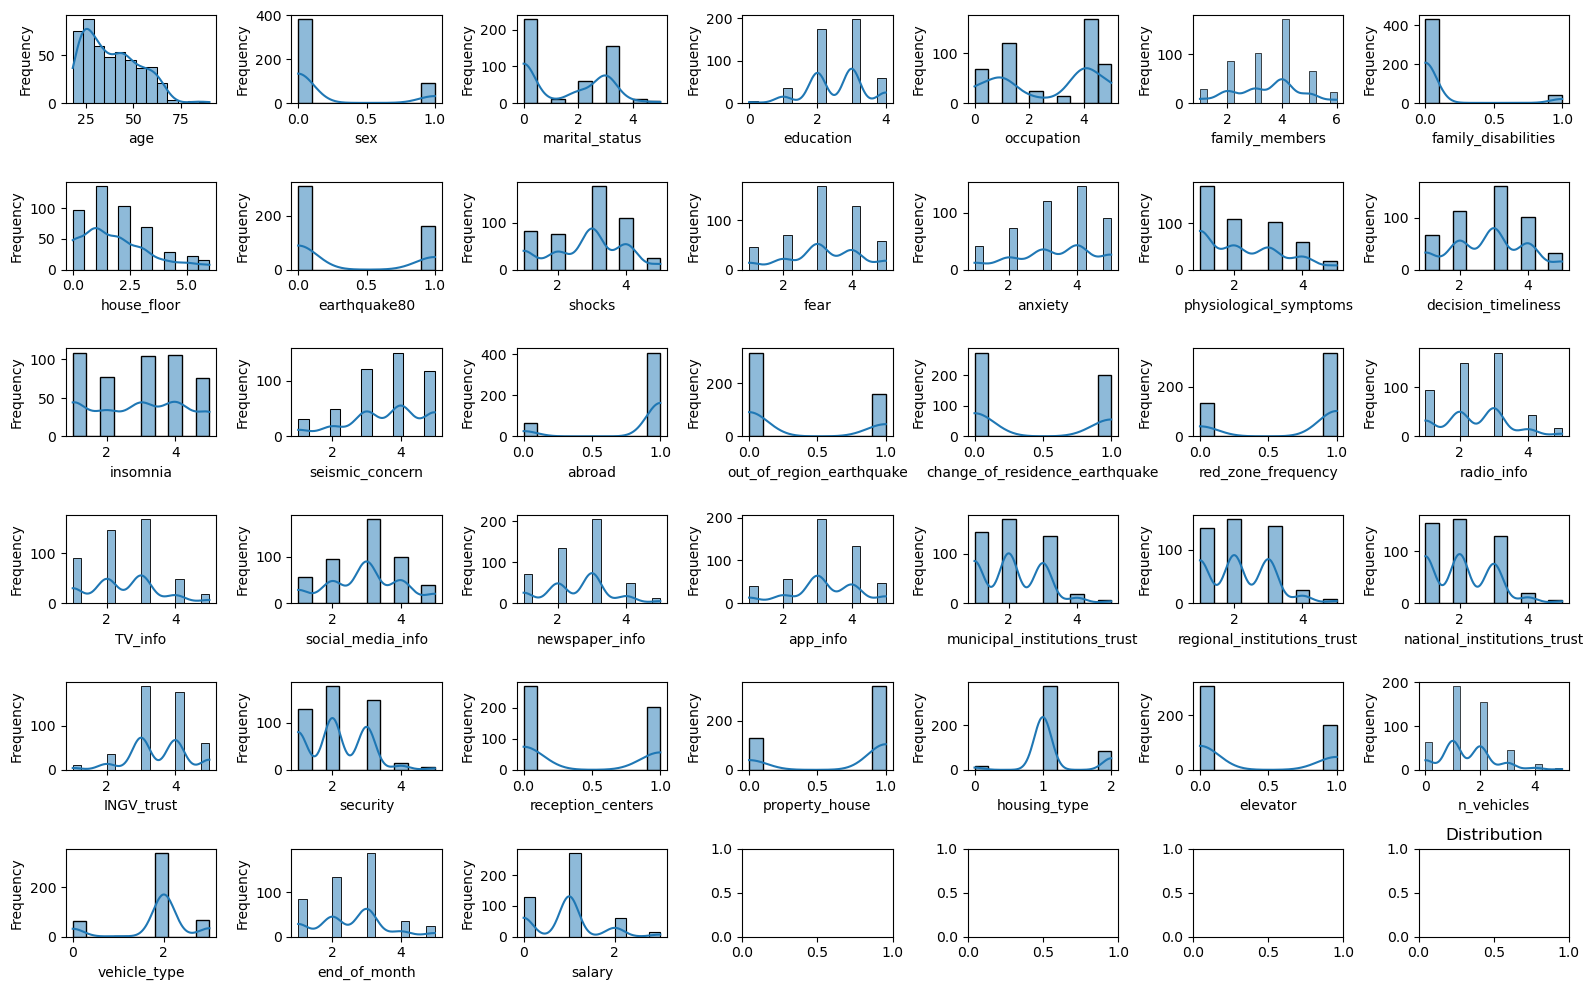

In [25]:
# Before doing values inplacement, I'd like to see distributions of each column    
fig, axs = plt.subplots(6, 7, figsize=(16, 10))  

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
plt.title("Distribution")
plt.tight_layout()
plt.show()

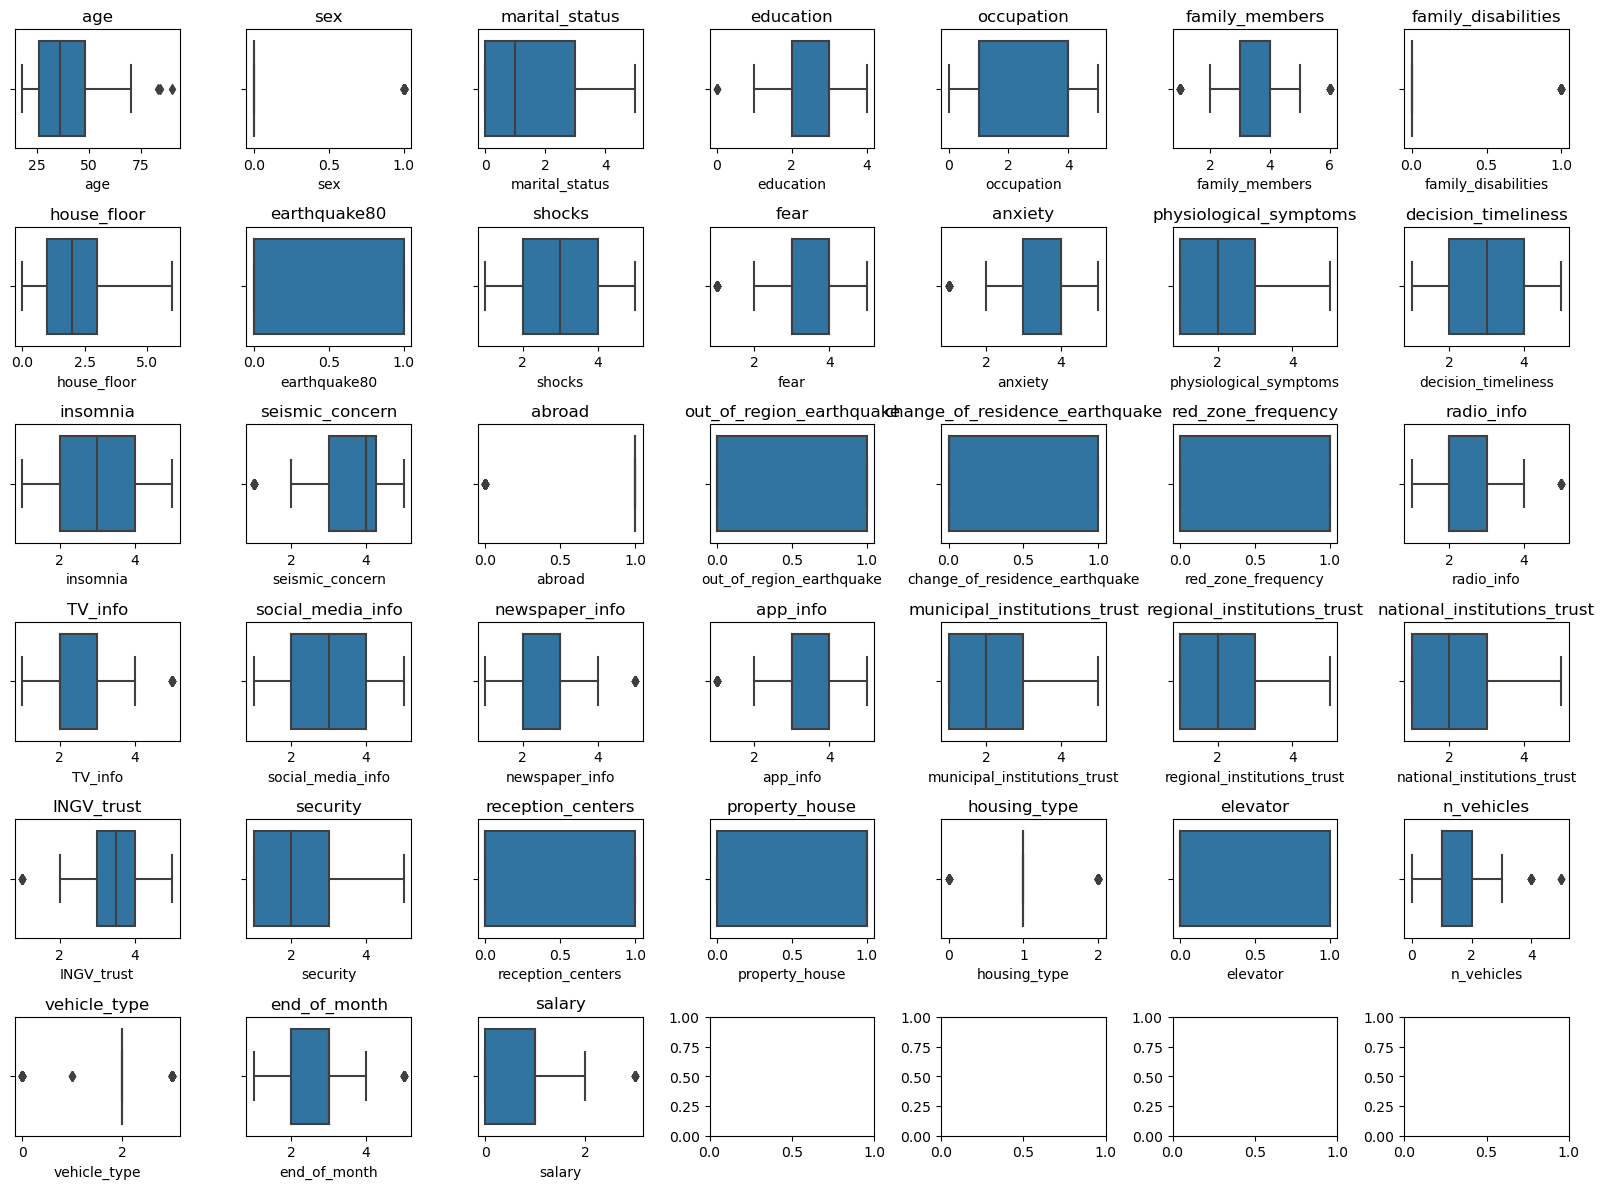

In [26]:
# Working with outliers
# plot the outliers for each feature using box-plot
# Plot outliers using box plots for each feature in subplots
fig, axs = plt.subplots(6, 7, figsize=(16, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()
# because of the low amount of men, people with family disabilities, those who worked abroad, they can be detected as outliers. 
# my next steps would be, to create new features -> select relevent features -> outliers detecction -> outliers deletion or
# normilisation

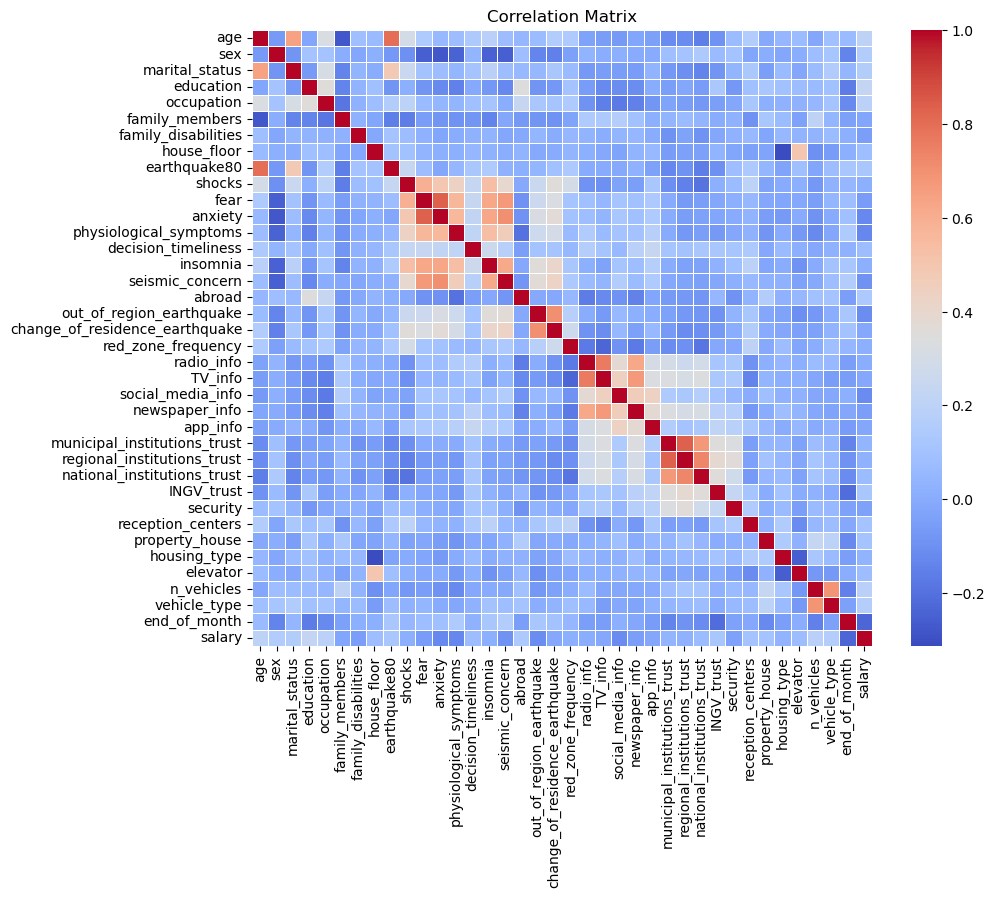

In [27]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plotting correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
# Accordind to the correlation matrix and analysis aim I choose "fear" to be a target column

In [28]:
corr_matrix = df.corr()["fear"].sort_values()
corr_matrix

sex                              -0.255662
abroad                           -0.090752
education                        -0.084106
regional_institutions_trust      -0.063390
salary                           -0.060466
family_members                   -0.054594
n_vehicles                       -0.049639
national_institutions_trust      -0.049563
housing_type                     -0.021246
property_house                   -0.019373
INGV_trust                       -0.017035
elevator                         -0.014689
municipal_institutions_trust     -0.002998
security                          0.014960
family_disabilities               0.022762
house_floor                       0.034248
vehicle_type                      0.044324
TV_info                           0.051630
reception_centers                 0.055016
occupation                        0.062492
earthquake80                      0.074780
end_of_month                      0.080785
radio_info                        0.087803
newspaper_i

<Axes: title={'center': 'Amount of people with each level of fear'}>

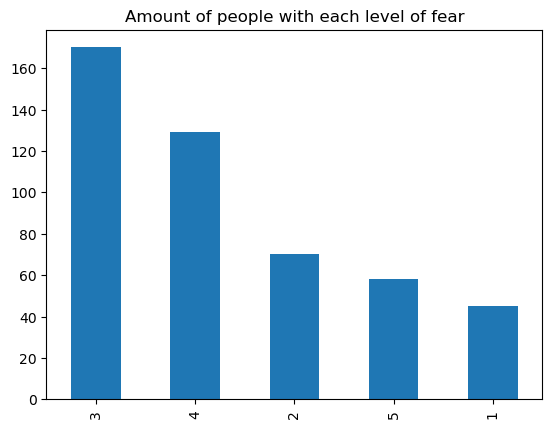

In [29]:
df["fear"].value_counts().plot(kind="bar", title="Amount of people with each level of fear")
# Most of people have middle level of fear

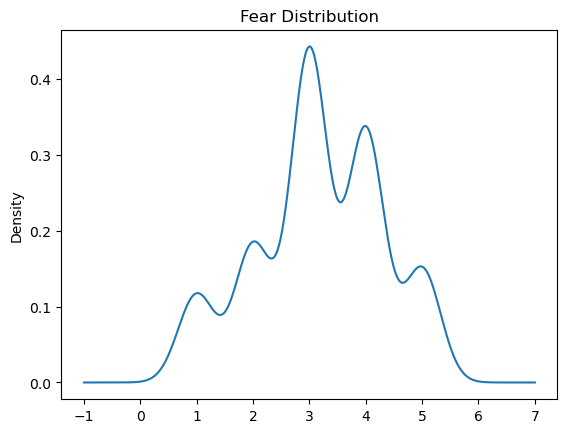

In [30]:
ax = df["fear"].plot(kind = "kde", title = 'Fear Distribution')
# there is almost normal distribution

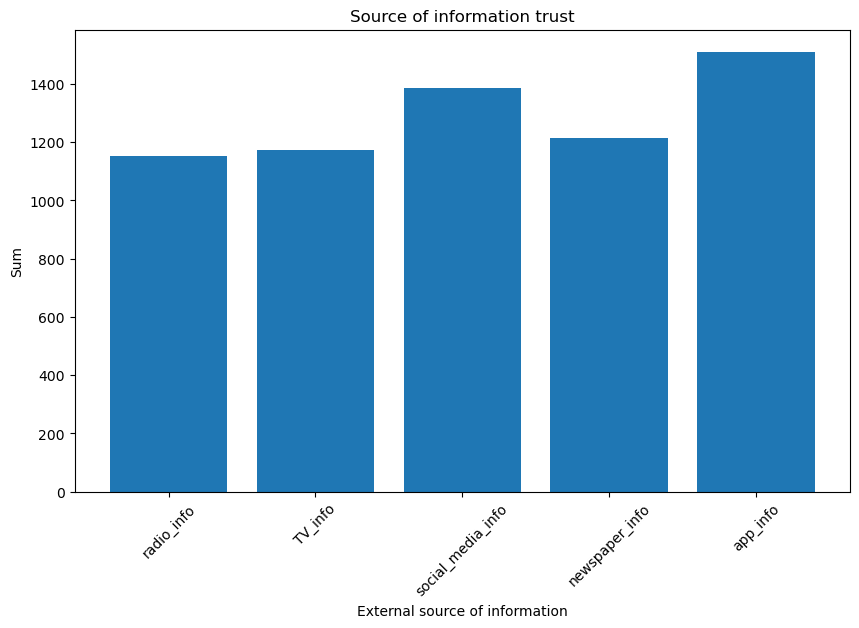

In [31]:
# Which external source of information is most trusted?
sources = ["radio_info", "TV_info", "social_media_info", "newspaper_info", "app_info"]
ext_source_data = df[sources].copy()
ext_source_data_sum = ext_source_data.sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ext_source_data_sum.index, ext_source_data_sum.values)
plt.xlabel('External source of information')
plt.ylabel('Sum')
plt.title('Source of information trust')
plt.xticks(rotation=45)
plt.show()
# Apps and social media are trusted the most
# Should be created a new variable ext_source_trust which would contain person's trust to the external information

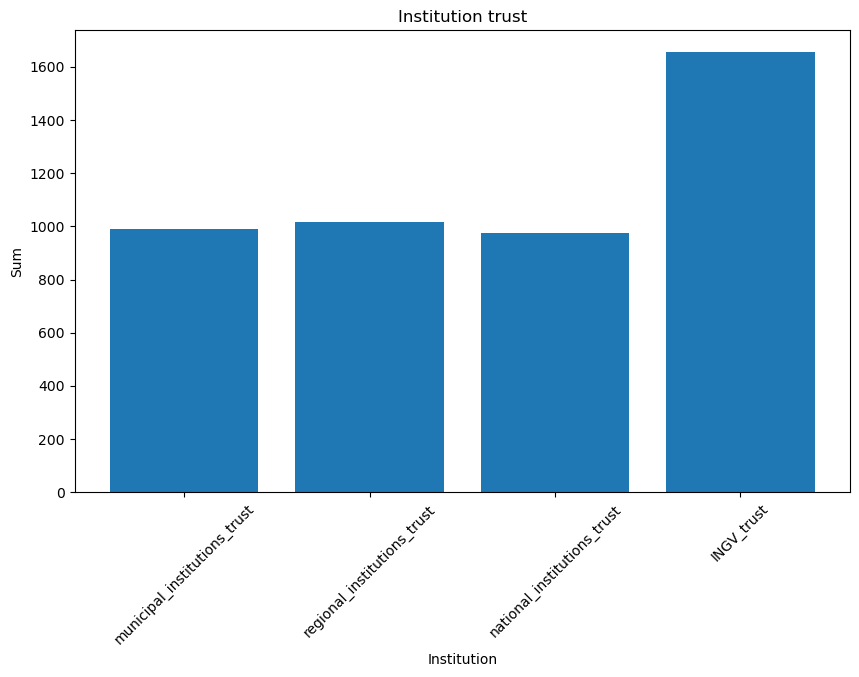

In [32]:
# Which external institution is most trusted?
institutions = ["municipal_institutions_trust", "regional_institutions_trust", "national_institutions_trust", "INGV_trust"]
institutions_data = df[institutions].copy()
institutions_data_sum = institutions_data.sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(institutions_data_sum.index, institutions_data_sum.values)
plt.xlabel('Institution')
plt.ylabel('Sum')
plt.title('Institution trust')
plt.xticks(rotation=45)
plt.show()
# INGV is trusted the most
# Should be created a new variable institution_trust which would contain person's trust to the institutions trust

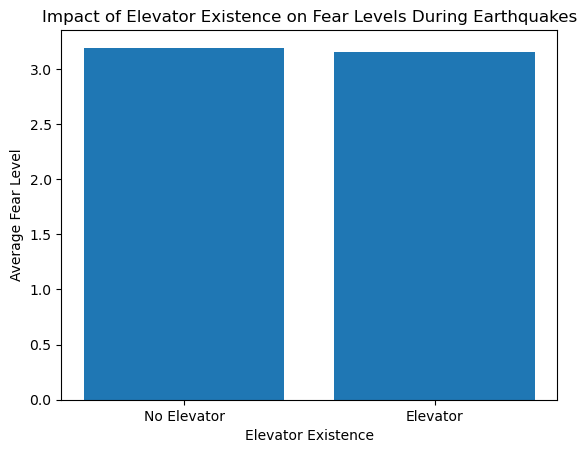

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,0,0.0,1,0.0
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,0.0,5,3.0,1,2.0
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,0,0.0,1,1.0
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,1.0,2,2.0,5,0.0
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,0,0.0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,3,2.0,3,1.0
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1,2.0,3,1.0
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1,2.0,1,1.0
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,1.0,2,2.0,2,2.0


In [33]:
# how the elevator existence influence on the amount of fear face to the earthquakes?
elevator_fear = round_df[["elevator", "fear"]].copy()
fear_by_elevator = elevator_fear.groupby('elevator')['fear'].mean().reset_index()
# Plotting the average fear levels for groups with and without elevators
plt.bar(fear_by_elevator['elevator'], fear_by_elevator['fear'], tick_label=['No Elevator', 'Elevator'])
plt.xlabel('Elevator Existence')
plt.ylabel('Average Fear Level')
plt.title('Impact of Elevator Existence on Fear Levels During Earthquakes')
plt.show()

# elevator exicstene has not a lot influence to the fear, so I drrop it
round_df.drop(["elevator"], axis=1, inplace=True)
round_df

In [34]:
# Compute correlation matrix
corr_matrix = round_df.corr()["fear"]
corr_matrix.sort_values()

sex                              -0.255662
abroad                           -0.090752
education                        -0.084106
regional_institutions_trust      -0.063390
salary                           -0.060466
family_members                   -0.054594
n_vehicles                       -0.049639
national_institutions_trust      -0.049563
housing_type                     -0.021246
property_house                   -0.019373
INGV_trust                       -0.017035
municipal_institutions_trust     -0.002998
security                          0.014960
family_disabilities               0.022762
house_floor                       0.034248
vehicle_type                      0.044324
TV_info                           0.051630
reception_centers                 0.055016
occupation                        0.062492
earthquake80                      0.074780
end_of_month                      0.080785
radio_info                        0.087803
newspaper_info                    0.097726
marital_sta

## Feature Engineering

In [35]:
# Create a new feature ext_source_trust - how much each person trusts external data soures
ext_source_trust = ext_source_data.sum(axis=1)
# df.drop(sources, axis=1, inplace=True)
df["ext_source_trust"] = ext_source_trust / len(sources)
df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary,ext_source_trust
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,1.0,0,0.0,1,0.0,3.4
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,0.0,1.0,5,3.0,1,2.0,2.2
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,1.0,0,0.0,1,1.0,2.0
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,2,2.0,5,0.0,1.0
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,1.0,0,0.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,1.0,3,2.0,3,1.0,5.0
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1.0,1,2.0,3,1.0,3.0
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1.0,1,2.0,1,1.0,1.8
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,1.0,0.0,2,2.0,2,2.0,3.2


In [36]:
# Create a new feature institution_trust - how much each person trusts different institutions
institutions_trust = institutions_data.sum(axis=1)

# df.drop(institutions, axis=1, inplace=True)
df["institution_trust"] = institutions_trust / len(institutions)
df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary,ext_source_trust,institution_trust
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,1.0,0,0.0,1,0.0,3.4,3.25
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,0.0,1.0,5,3.0,1,2.0,2.2,2.25
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,1.0,0,0.0,1,1.0,2.0,2.75
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,2,2.0,5,0.0,1.0,1.00
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,1.0,0,0.0,3,1.0,3.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,1.0,3,2.0,3,1.0,5.0,2.25
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1.0,1,2.0,3,1.0,3.0,3.00
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1.0,1,2.0,1,1.0,1.8,2.75
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,1.0,0.0,2,2.0,2,2.0,3.2,3.00


In [37]:
# add new feature eartquake_experience, which contains all experience, which each person had due to the life and the amount of 
# streass he has 
experiences = ["earthquake80", "shocks", "out_of_region_earthquake", "change_of_residence_earthquake", "red_zone_frequency"]
# because these columns had different weights, they can't be just summed
# weights are take from the correlation matrix, taking into account the fakt that "fear" is a target column 
df["earthquake_experience"] = (
    df["earthquake80"] * 0.2 + 
    df["shocks"] * 0.6 + 
    df["out_of_region_earthquake"] * 0.3 +
    df["change_of_residence_earthquake"] * 0.3 + 
    df["red_zone_frequency"] * 0.1
)
# df.drop(["earthquake80", "out_of_region_earthquake", "change_of_residence_earthquake", "red_zone_frequency"], axis=1, inplace=True)
df
# the correlation with the fear = 0.5. Pleasant result

,age,sex,marital_status,education,occupation,family_members,family_disabilities,house_floor,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary,ext_source_trust,institution_trust,earthquake_experience
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,1.0,0,0.0,1,0.0,3.4,3.25,1.8
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,4.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,0.0,1.0,5,3.0,1,2.0,2.2,2.25,0.7
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,4.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,1.0,0,0.0,1,1.0,2.0,2.75,2.5
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,2,2.0,5,0.0,1.0,1.00,2.5
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,1.0,0,0.0,3,1.0,3.0,2.75,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,1.0,3,2.0,3,1.0,5.0,2.25,1.8
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1.0,1,2.0,3,1.0,3.0,3.00,1.3
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,6.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1.0,1,2.0,1,1.0,1.8,2.75,1.9
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,3.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,1.0,0.0,2,2.0,2,2.0,3.2,3.00,2.5


In [38]:
# After a small research I found out thet the higher is the house, the more damaged it would be after the earthquake, so the security
# of people really depends from the type(length) of house and the floor (the lower is the floor the better)
df["house_security"] = round_df["housing_type"] + (df["house_floor"].max() - df["house_floor"])
df.drop(["housing_type", "house_floor"], axis=1, inplace=True)
df

,age,sex,marital_status,education,occupation,family_members,family_disabilities,earthquake80,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,abroad,out_of_region_earthquake,change_of_residence_earthquake,red_zone_frequency,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,reception_centers,property_house,elevator,n_vehicles,vehicle_type,end_of_month,salary,ext_source_trust,institution_trust,earthquake_experience,house_security
0,21.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,3,2,2,2,3,1,2,1.0,0.0,0.0,0.0,3,4,2,4,4,3,3,3,4,2,0.0,1.0,1.0,0,0.0,1,0.0,3.4,3.25,1.8,6.0
1,21.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1,2,2,1,3,2,4,1.0,0.0,0.0,1.0,3,2,2,2,2,2,2,2,3,1,0.0,1.0,1.0,5,3.0,1,2.0,2.2,2.25,0.7,2.0
2,21.0,0.0,0.0,2.0,2.0,5.0,0.0,0.0,3,2,2,1,4,2,3,1.0,1.0,1.0,1.0,2,2,2,2,2,2,2,2,5,3,1.0,1.0,1.0,0,0.0,1,1.0,2.0,2.75,2.5,3.0
3,23.0,1.0,0.0,2.0,1.0,5.0,0.0,0.0,3,3,3,3,1,3,4,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,2,2.0,5,0.0,1.0,1.00,2.5,5.0
4,64.0,0.0,0.0,3.0,3.0,1.0,0.0,1.0,4,4,4,3,2,3,4,1.0,0.0,1.0,1.0,3,3,3,3,3,2,3,2,4,2,0.0,0.0,1.0,0,0.0,3,1.0,3.0,2.75,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,3,3,3,1,2,2,4,1.0,0.0,0.0,0.0,5,5,5,5,5,2,2,2,3,3,0.0,1.0,1.0,3,2.0,3,1.0,5.0,2.25,1.8,7.0
468,32.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,2,4,4,3,3,2,4,0.0,0.0,0.0,1.0,3,3,3,3,3,3,3,3,3,2,0.0,1.0,1.0,1,2.0,3,1.0,3.0,3.00,1.3,6.0
469,45.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,2,1,2,2,4,2,3,0.0,1.0,1.0,1.0,1,1,3,2,2,2,3,3,3,3,1.0,1.0,1.0,1,2.0,1,1.0,1.8,2.75,1.9,1.0
470,44.0,0.0,2.0,4.0,5.0,4.0,0.0,0.0,3,3,4,2,2,4,4,1.0,1.0,1.0,1.0,3,3,4,3,3,3,3,2,4,2,1.0,0.0,0.0,2,2.0,2,2.0,3.2,3.00,2.5,4.0


In [39]:
# assume that Car contains 5 places and Motorcycle/Scooter - 2
# then if person has Motorcycle/Scooter -  2 people can leave the house
# if car - 5, if car and motocycle - 7 
# beause car and motocycle = 2 vehicles, the easiest way would be to present this group as 3.5 people, who can leave
# rows with the vehicle type = car and motocycle and n_vehicles <=1 are considered as outliers and would be deleted
vehicle_condition = (df["n_vehicles"] <= 1.0) & (df["vehicle_type"] == 3.0) | (df["n_vehicles"] == 0.0) & ((df["vehicle_type"] <= 2.0) & (df["vehicle_type"] >= 1.0))
df = df[~vehicle_condition].copy()
df.shape

(468, 40)

In [40]:
# create the feature, which indicates amount of people who can be taken according to the vehiccle type and number of vehiles
vehicle_mapping = {
    0.0: 0.0,
    1.0: 2.0,
    2.0: 5.0,
    3.0: 3.5
}
df["people_to_take"] = df['vehicle_type'].map(vehicle_mapping)
df["people_to_take"] = df["people_to_take"] * df["n_vehicles"]
df["people_to_take"]

0       0.0
1      17.5
2       0.0
3      10.0
4       0.0
       ... 
467    15.0
468     5.0
469     5.0
470    10.0
471    10.0
Name: people_to_take, Length: 468, dtype: float64

In [41]:
df["family_situation"] = df["family_members"] + df["family_disabilities"]
corr_matrix = df.corr()["fear"]
corr_matrix.sort_values()

sex                              -0.250861
abroad                           -0.092041
education                        -0.086506
salary                           -0.066535
regional_institutions_trust      -0.059367
family_members                   -0.051855
n_vehicles                       -0.047116
family_situation                 -0.046271
national_institutions_trust      -0.045714
institution_trust                -0.038737
people_to_take                   -0.032197
house_security                   -0.024945
elevator                         -0.022880
property_house                   -0.017521
INGV_trust                       -0.016712
municipal_institutions_trust     -0.003491
security                          0.011931
family_disabilities               0.018332
vehicle_type                      0.043241
TV_info                           0.051582
reception_centers                 0.052663
occupation                        0.061220
earthquake80                      0.070571
end_of_mont

In [42]:
# if person lives with family and has no vehicle, it can increase the fear face to the earthquake
df["family_replacement_stress"] = (df["people_to_take"] - df["family_situation"]) * df["decision_timeliness"]
df["family_replacement_stress"]

0     -12.0
1      37.5
2     -20.0
3       5.0
4      -2.0
       ... 
467    18.0
468     6.0
469    16.0
470    12.0
471    30.0
Name: family_replacement_stress, Length: 468, dtype: float64

In [43]:
# Define the most importat features according to the target column
# using PValueSelector
from kydavra import PValueSelector, LassoSelector, PointBiserialCorrSelector
pvalue_selector = PValueSelector()
pvalue_selected_columns = pvalue_selector.select(round_df, "fear")
pvalue_selected_columns

['shocks',
 'anxiety',
 'physiological_symptoms',
 'seismic_concern',
 'out_of_region_earthquake']

In [44]:
# using LassoSelector
pbcs = PointBiserialCorrSelector()
pbcs_selected_columns = pbcs.select(round_df, "fear")
pbcs_selected_columns

['anxiety', 'sex', 'physiological_symptoms', 'insomnia', 'seismic_concern']

In [45]:
# According to previoulsy selected columns columns beside ones, which are in the variables pvalue_selected_columns or pbcs_selected_columns
# + "earthquake_experience" and "decision_timeliness" would not be used anymore
columns_remain = pvalue_selected_columns + list(set(pbcs_selected_columns) - set(pvalue_selected_columns))
columns_remain.append("earthquake_experience")
columns_remain.append("decision_timeliness")
columns_remain.append("fear")
columns_remain

['shocks',
 'anxiety',
 'physiological_symptoms',
 'seismic_concern',
 'out_of_region_earthquake',
 'sex',
 'insomnia',
 'earthquake_experience',
 'decision_timeliness',
 'fear']

In [46]:
df = df[columns_remain].copy()
df

,shocks,anxiety,physiological_symptoms,seismic_concern,out_of_region_earthquake,sex,insomnia,earthquake_experience,decision_timeliness,fear
0,3,2,2,2,0.0,1.0,1,1.8,3,2
1,1,2,1,4,0.0,0.0,2,0.7,3,2
2,3,2,1,3,1.0,0.0,2,2.5,4,2
3,3,3,3,4,1.0,1.0,3,2.5,1,3
4,4,4,3,4,0.0,0.0,3,3.0,2,4
...,...,...,...,...,...,...,...,...,...,...
467,3,3,1,4,0.0,1.0,2,1.8,2,3
468,2,4,3,4,0.0,0.0,2,1.3,3,4
469,2,2,2,3,1.0,0.0,2,1.9,4,1
470,3,4,2,4,1.0,0.0,4,2.5,2,3


## Outlier Detection and Handling

C:\Users\Anastasi\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-10.383320703557267 > -76.228601137356847). You may want to try with a higher value of support_fraction (current value: 0.511).
  warnings.warn(
C:\Users\Anastasi\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-10.383320703557267 > -76.228195408822060). You may want to try with a higher value of support_fraction (current value: 0.511).
  warnings.warn(
C:\Users\Anastasi\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-10.387754508422033 > -76.218722183955791). You may want to try with a higher value of support_fraction (current value: 0.511).
  warnings.warn

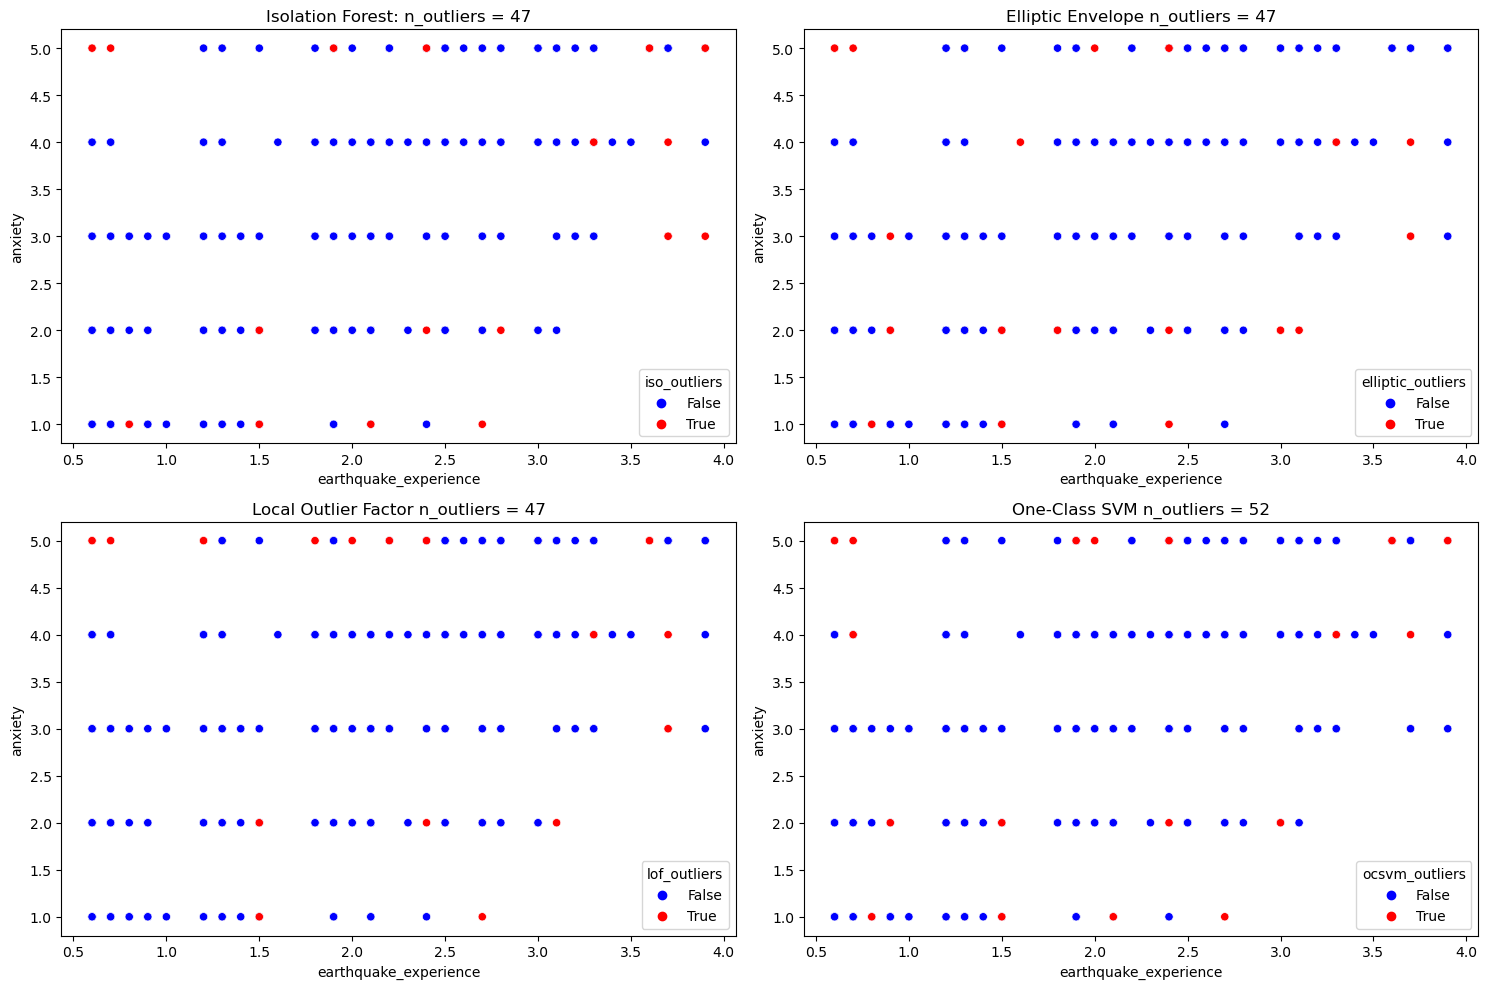

In [47]:
# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['fear'])), columns=df.columns[:-1])

# Isolation Forest
iso = IsolationForest(contamination=0.1)
df['iso_outliers'] = iso.fit_predict(df_scaled)

# Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.1)
df['elliptic_outliers'] = elliptic.fit_predict(df_scaled)

# Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
df['lof_outliers'] = lof.fit_predict(df_scaled)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.1)
df['ocsvm_outliers'] = ocsvm.fit_predict(df_scaled)

# Map Oultiers as True, non-outliers as False
outlier_mappings = {-1: True, 1: False}
df['iso_outliers'] = df['iso_outliers'].map(outlier_mappings)
n_iso_outliers = df["iso_outliers"].sum()
df['elliptic_outliers'] = df['elliptic_outliers'].map(outlier_mappings)
n_elliptic_outliers = df["elliptic_outliers"].sum()
df['lof_outliers'] = df['lof_outliers'].map(outlier_mappings)
n_lof_outliers = df["lof_outliers"].sum()
df['ocsvm_outliers'] = df['ocsvm_outliers'].map(outlier_mappings)
n_ocsvm_outliers = df["ocsvm_outliers"].sum()

# Outliers Plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(ax=axes[0, 0], x='earthquake_experience', y='anxiety', hue='iso_outliers', data=df, palette={True: 'red', False: 'blue'})
axes[0, 0].set_title(f'Isolation Forest: n_outliers = {n_iso_outliers}')

sns.scatterplot(ax=axes[0, 1], x='earthquake_experience', y='anxiety', hue='elliptic_outliers', data=df, palette={True: 'red', False: 'blue'})
axes[0, 1].set_title(f'Elliptic Envelope n_outliers = {n_elliptic_outliers}')

sns.scatterplot(ax=axes[1, 0], x='earthquake_experience', y='anxiety', hue='lof_outliers', data=df, palette={True: 'red', False: 'blue'})
axes[1, 0].set_title(f'Local Outlier Factor n_outliers = {n_lof_outliers}')

sns.scatterplot(ax=axes[1, 1], x='earthquake_experience', y='anxiety', hue='ocsvm_outliers', data=df, palette={True: 'red', False: 'blue'})
axes[1, 1].set_title(f'One-Class SVM n_outliers = {n_ocsvm_outliers}')

plt.tight_layout()
plt.show()


In [48]:
# Identify rows that are outliers in all four models
df['all_outliers'] = df[['iso_outliers', 'elliptic_outliers', 'lof_outliers', 'ocsvm_outliers']].all(axis=1)

# Print the number of rows, which defined as outliers by every model
print(f"Number of rows identified as outliers by all models: {df['all_outliers'].sum()}")

# Drop outliers
df_cleaned = df[~df['all_outliers']].copy()

# Drop outlier columns
df_cleaned = df_cleaned.drop(columns=['iso_outliers', 'elliptic_outliers', 'lof_outliers', 'ocsvm_outliers', 'all_outliers'])

# Update df
df = df_cleaned.copy()

Number of rows identified as outliers by all models: 15


## Model Selection
Beause predited data should be: 1, 2, 3, 4 - classifiation model should be choosen and trained

In [49]:
# Create the pipelines for every classification model with hyperparemeter tuning

# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy')

# Support Vector Machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy')

# K-nearest Neighbours
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy')

In [50]:
# Model Evaluation function
def evaluate_model(grid_search, X_train, y_train, X_test, y_test):
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred)
    print(report)
    return best_model, report

X = df.drop(columns=['fear']) 
y = df['fear']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model with hyperparameter tuning
print("Random Forest Classifier:")
rf_model, rf_report = evaluate_model(rf_grid, X_train, y_train, X_test, y_test)

print("Support Vector Classifier:")
svm_model, svm_report = evaluate_model(svm_grid, X_train, y_train, X_test, y_test)

print("K-Nearest Neighbors Classifier:")
knn_model, knn_report = evaluate_model(knn_grid, X_train, y_train, X_test, y_test)


Random Forest Classifier:
Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Accuracy: 0.6043956043956044
              precision    recall  f1-score   support

           1       0.53      0.67      0.59        12
           2       0.67      0.38      0.48        21
           3       0.56      0.92      0.70        24
           4       0.68      0.52      0.59        25
           5       0.67      0.44      0.53         9

    accuracy                           0.60        91
   macro avg       0.62      0.59      0.58        91
weighted avg       0.63      0.60      0.59        91

Support Vector Classifier:
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Accuracy: 0.5934065934065934
              precision    recall  f1-score   support

           1       0.53      0.67      0.59        12
           2       0.64      0.43      0.51        21
           3       0.53      0.83      

Random Forest Classifier Report:
['1', '0.53', '0.67', '0.59', '12']
['2', '0.67', '0.38', '0.48', '21']
['3', '0.56', '0.92', '0.70', '24']
['4', '0.68', '0.52', '0.59', '25']
['5', '0.67', '0.44', '0.53', '9']
[]
['accuracy', '0.60', '91']


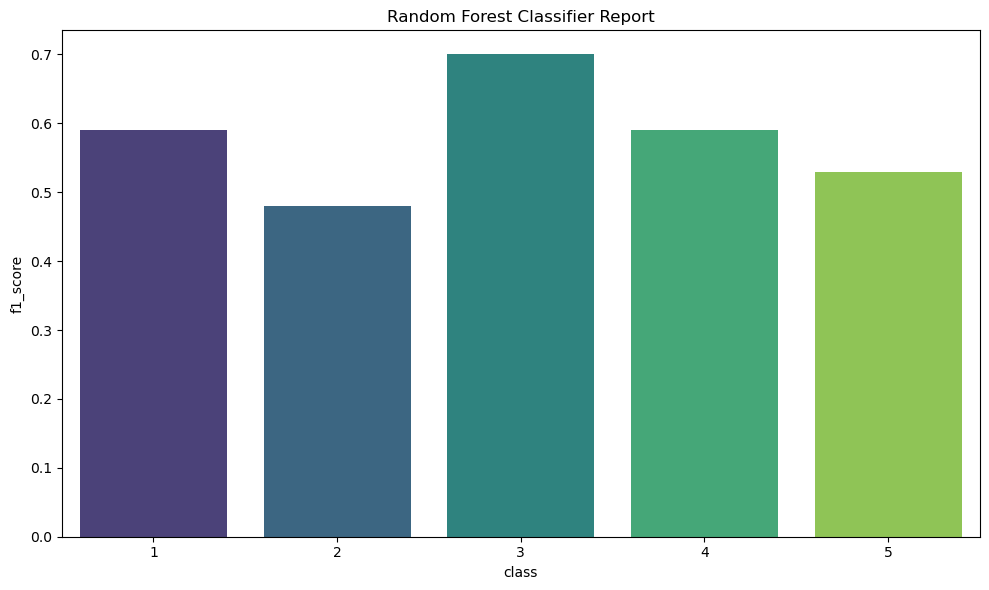

Support Vector Classifier Report:
['1', '0.53', '0.67', '0.59', '12']
['2', '0.64', '0.43', '0.51', '21']
['3', '0.53', '0.83', '0.65', '24']
['4', '0.67', '0.48', '0.56', '25']
['5', '0.83', '0.56', '0.67', '9']
[]
['accuracy', '0.59', '91']


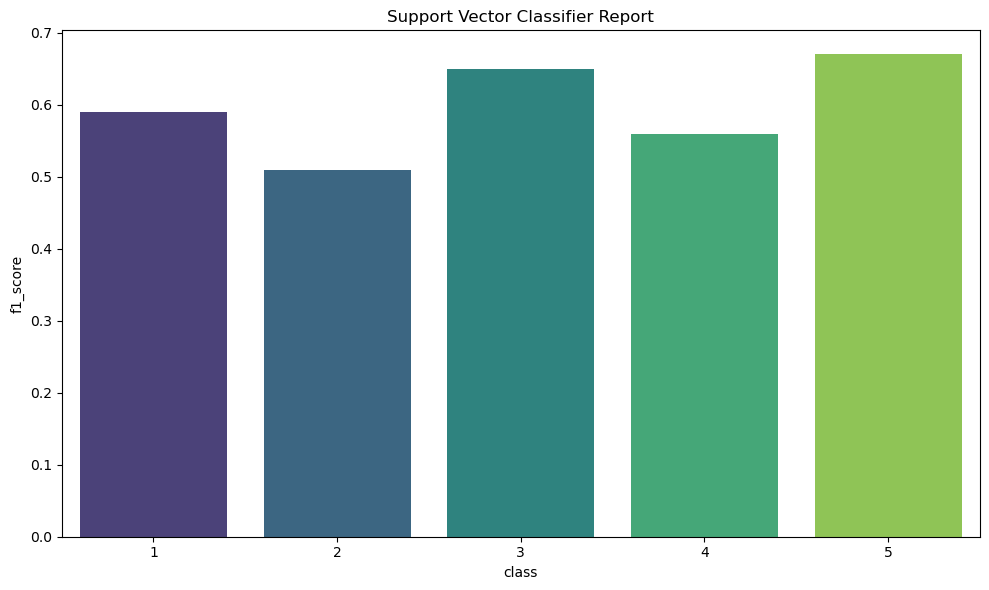

K-Nearest Neighbors Classifier Report:
['1', '0.54', '0.58', '0.56', '12']
['2', '0.57', '0.38', '0.46', '21']
['3', '0.47', '0.79', '0.59', '24']
['4', '0.65', '0.44', '0.52', '25']
['5', '0.71', '0.56', '0.63', '9']
[]
['accuracy', '0.55', '91']


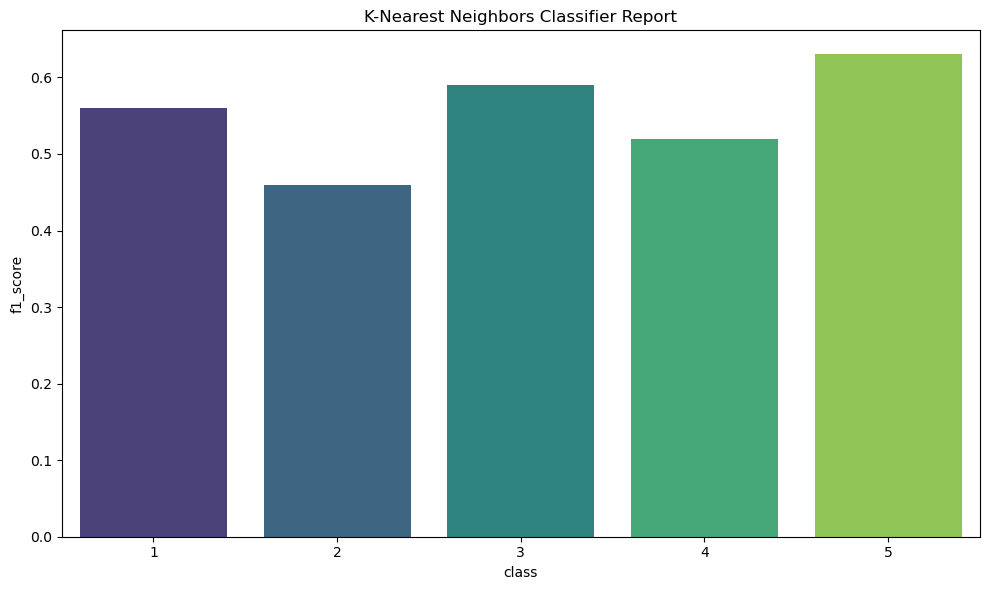

In [51]:
# Create a plot funtion have better classification report interpretation
def plot_classification_report(report, metric_name, title='Classification Report'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split()
        print(row_data)
        if len(row_data) >= 5:  
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = int(row_data[4])
            report_data.append(row)
            
    df = pd.DataFrame.from_dict(report_data)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='class', y=metric_name, data=df, palette='viridis')
    plt.title(title)
    plt.xticks()
    plt.tight_layout()
    plt.show()


# Plot classification reports for each model
print("Random Forest Classifier Report:")
plot_classification_report(rf_report, "f1_score", title="Random Forest Classifier Report")

print("Support Vector Classifier Report:")
plot_classification_report(svm_report, "f1_score", title="Support Vector Classifier Report")

print("K-Nearest Neighbors Classifier Report:")
plot_classification_report(knn_report, "f1_score", title="K-Nearest Neighbors Classifier Report")

## Conslusion: 
1) Accuracy is higher then 0.5 for every model which was selected to be trained. (Don't consider as suitable result)
2) Random Forest Classifier suits the most
3) The varying precision, recall, and F1-scores across different classes indicate that the model might be facing challenges with class imbalance or certain classes might be more difficult to predict than others, that is the main insight at the moment.
4) Cross-validation also is missed, while it could essentially understand the reason for succh low acccuracy.